In [54]:
import pandas as pd
df=pd.read_csv('./grouped_data5-1.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,3,119839.69,zero,2853.325952,39946.563333,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,2,83807.86,rest,2044.094146,41903.930000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,9,159660.80,rest,3801.447619,17740.088889,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,2,119839.69,zero,3072.812564,59919.845000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,3,125510.82,rest,2918.856279,41836.940000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,6,119839.69,zero,3072.812564,19973.281667,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,11,57369.61,rest,1639.131714,5215.419091,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,8,119839.69,zero,3328.880278,14979.961250,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,4,75075.31,rest,1787.507381,18768.827500,2,1,46444.260,0,92888.52,high,1


In [55]:
df.dtypes

credit_score             int64
credit__section         object
country                 object
age                      int64
age_group               object
gender                  object
age_group_gender        object
tenure                   int64
balance                float64
balance_group           object
balance_per_age        float64
balance_per_tenure     float64
products_number          int64
credit_card              int64
salary_per_products    float64
active_member            int64
estimated_salary       float64
salary_range            object
churn                    int64
dtype: object

# 신용 점수와 추정 월급과의 상관계수

In [56]:
import pandas as pd
import numpy as np

# 피어슨 상관계수 계산
correlation = df['estimated_salary'].corr(df['credit_score'])
print(f"피어슨 상관계수: {correlation}")

# 이 참에 전체 상관계수를 한번 더 확인한다

피어슨 상관계수: -0.0013842928679845211


In [57]:
# 일단 데이터 타입을 확인해서 수치형 변수만 골라낸다
df['active_member']=df['active_member'].astype('object')
df['credit_card']=df['credit_card'].astype('object')

df.dtypes

credit_score             int64
credit__section         object
country                 object
age                      int64
age_group               object
gender                  object
age_group_gender        object
tenure                   int64
balance                float64
balance_group           object
balance_per_age        float64
balance_per_tenure     float64
products_number          int64
credit_card             object
salary_per_products    float64
active_member           object
estimated_salary       float64
salary_range            object
churn                    int64
dtype: object

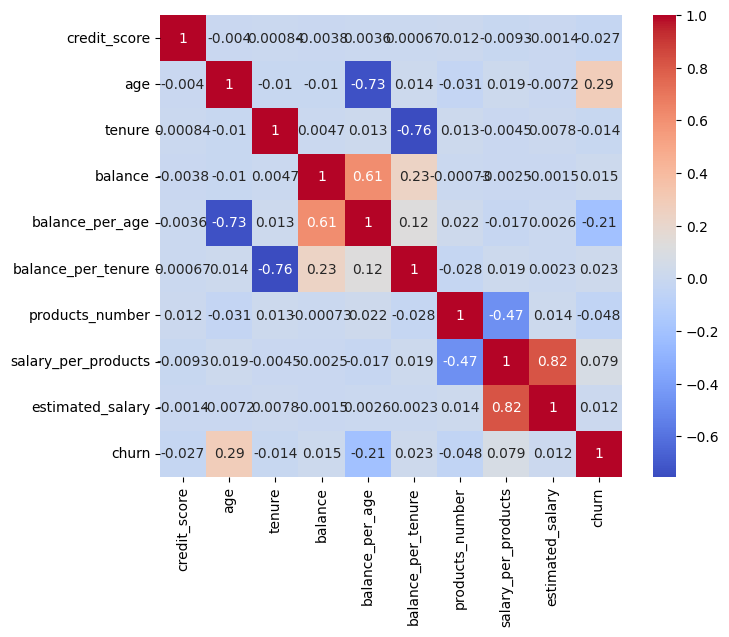

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num=df.select_dtypes(include=[int,float])

# 상관계수 계산
correlation_matrix = df_num.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
# plt.title('Correlation Heatmap')
plt.show()

# 보통 신용 점수와 추정 월급은 연관이 깊지 않나
# 아무튼 재확인해보니 이 데이터셋에서 상관계수는 낮다

# 종속 변수와의 상관계수-정보 이득이 낮은 파생 변수를 버려야 할지 결정한다

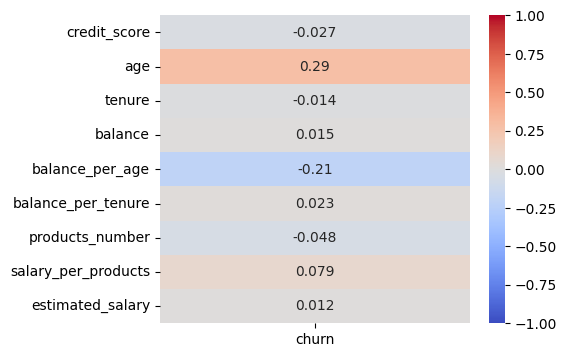

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 수치형 열 선택
df_num = df.select_dtypes(include=[int, float])

# 상관계수 행렬 계산
corr_matrix = df_num.corr(method='pearson')

# 종속 변수와 독립 변수 간의 상관계수만 추출
target_corr = corr_matrix[['churn']].drop('churn')

# 히트맵 시각화
plt.figure(figsize=(5,4))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# annot 셀의 값 표기
# plt.title('종속 변수와 독립 변수 간의 상관계수')
plt.show()

# 정보 이득이 낮은 파생 변수가 대부분 구간을 나눈 것
# 즉 범주형 변수를 다뤄야 하니 이것은 적합하지 않다

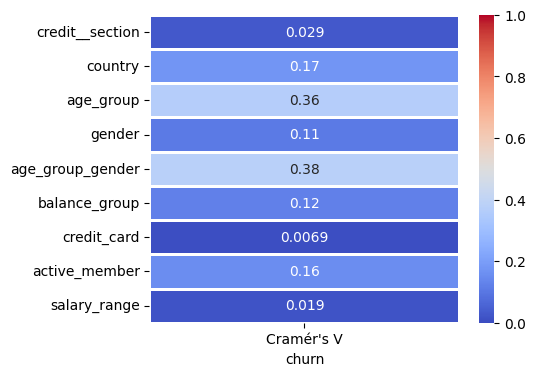

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 크레이머 V 계산 함수
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# 종속 변수와 독립 변수 간의 크레이머 V 계산 함수
def cramers_v_for_target(df, target):
    independent_vars = [col for col in df.columns if col != target]
    cramers_v_values = []

    for col in independent_vars:
        cramers_v_values.append(cramers_v(df[target], df[col]))
    
    return pd.DataFrame({'Independent Variable': independent_vars, 'Cramér\'s V': cramers_v_values})

df['churn']=df['churn'].astype('object')

df_cat = df.select_dtypes(include=[object])

# 종속 변수 'churn'과 독립 변수들 간의 크레이머 V 계산
cramers_v_df = cramers_v_for_target(df_cat, 'churn')

# 시각화
plt.figure(figsize=(5, 4))

# 'churn'과 독립 변수들의 크레이머 V 계수 시각화
sns.heatmap(cramers_v_df.set_index('Independent Variable'), 
            annot=True, cmap='coolwarm', cbar=True, linewidths=1, vmax=1, vmin=0)

# plt.xlabel('Independent Variables')
plt.xlabel('churn')
plt.ylabel('')  # y축 라벨 숨김
# plt.title('Cramér\'s V for \'churn\' and Independent Variables')
plt.show()


In [61]:
help(cramers_v_for_target)

Help on function cramers_v_for_target in module __main__:

cramers_v_for_target(df, target)
    # 종속 변수와 독립 변수 간의 크레이머 V 계산 함수



# 중요 변수 추출-ANOVA 기법으로 범주형 독립 변수와 종속 변수의 관계성 분석

In [62]:
# 아노바 기법 중단
# 종속 변수가 연속형일 경우 적합하다. 본 데이터셋의 종속 변수는 이진 분류 데이터이므로 사용하지 않는다

# ANOVA(분산 분석) 기법
# 일반적으로 연속형 종속 변수를 다루는 데 적합합니다
# 그룹 간 평균의 차이를 검정하는 방법이기 때문에, 종속 변수가 이진 분류 데이터인 경우에는 적합하지 않을 수 있습니다

# 이진 분류 데이터가 있을 경우
# 주로 로지스틱 회귀 분석(Logistic Regression)
# 카이제곱 검정(Chi-Square Test) 등
# 로지스틱 회귀는 이진 종속 변수를 다루는 데 적합
# 카이제곱 검정은 범주형 데이터 간의 독립성을 검정하는 데 사용

# 정보 이득과 상관 계수, 크레이머 v 계수를 바탕으로 중요 변수 추출

In [63]:
df.columns

Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
       'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
       'balance_per_age', 'balance_per_tenure', 'products_number',
       'credit_card', 'salary_per_products', 'active_member',
       'estimated_salary', 'salary_range', 'churn'],
      dtype='object')

In [64]:
df_after=df.drop(['credit__section','age', 'age_group','gender','tenure','balance','balance_group','products_number','credit_card','salary_range','estimated_salary'],axis=1)
df_after

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,France,forties_Female,2853.325952,39946.563333,101348.880,1,1
1,608,Spain,forties_Female,2044.094146,41903.930000,112542.580,1,0
2,502,France,forties_Female,3801.447619,17740.088889,37977.190,0,1
3,699,France,thirties_Female,3072.812564,59919.845000,46913.315,0,0
4,850,Spain,forties_Female,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,3072.812564,19973.281667,48135.320,0,0
9996,516,France,thirties_Male,1639.131714,5215.419091,101699.770,1,0
9997,709,France,thirties_Female,3328.880278,14979.961250,42085.580,1,1
9998,772,Germany,forties_Male,1787.507381,18768.827500,46444.260,0,1


In [65]:
csv_filename = '중요변수만추출.csv'
df_after.to_csv(csv_filename, index=False)

In [66]:
df_after.dtypes

credit_score             int64
country                 object
age_group_gender        object
balance_per_age        float64
balance_per_tenure     float64
salary_per_products    float64
active_member           object
churn                   object
dtype: object

# one hot encoding

In [67]:
df_after.select_dtypes(include=[object]).columns

Index(['country', 'age_group_gender', 'active_member', 'churn'], dtype='object')

In [68]:
df_onehot=pd.get_dummies(df_after,columns=['country', 'age_group_gender', 'active_member'])
df_encoded=df_onehot.astype(float)
df_encoded

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,active_member_0,active_member_1
0,619.0,2853.325952,39946.563333,101348.880,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,608.0,2044.094146,41903.930000,112542.580,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,502.0,3801.447619,17740.088889,37977.190,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,699.0,3072.812564,59919.845000,46913.315,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,850.0,2918.856279,41836.940000,79084.100,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,3072.812564,19973.281667,48135.320,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,516.0,1639.131714,5215.419091,101699.770,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,3328.880278,14979.961250,42085.580,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,772.0,1787.507381,18768.827500,46444.260,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
csv_filename = '중요변수추출후원핫인코딩.csv'
df_encoded.to_csv(csv_filename, index=False)

In [70]:
df_encoded['age_group_gender_fifties_Female'].value_counts()

age_group_gender_fifties_Female
0.0    9579
1.0     421
Name: count, dtype: int64

In [71]:
df_encoded.dtypes

credit_score                         float64
balance_per_age                      float64
balance_per_tenure                   float64
salary_per_products                  float64
churn                                float64
country_France                       float64
country_Germany                      float64
country_Spain                        float64
age_group_gender_eighties_Female     float64
age_group_gender_eighties_Male       float64
age_group_gender_fifties_Female      float64
age_group_gender_fifties_Male        float64
age_group_gender_forties_Female      float64
age_group_gender_forties_Male        float64
age_group_gender_nineties_Male       float64
age_group_gender_seventies_Female    float64
age_group_gender_seventies_Male      float64
age_group_gender_sixties_Female      float64
age_group_gender_sixties_Male        float64
age_group_gender_teenager_Female     float64
age_group_gender_teenager_Male       float64
age_group_gender_thirties_Female     float64
age_group_

In [72]:
df_encoded.columns

Index(['credit_score', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products', 'churn', 'country_France', 'country_Germany',
       'country_Spain', 'age_group_gender_eighties_Female',
       'age_group_gender_eighties_Male', 'age_group_gender_fifties_Female',
       'age_group_gender_fifties_Male', 'age_group_gender_forties_Female',
       'age_group_gender_forties_Male', 'age_group_gender_nineties_Male',
       'age_group_gender_seventies_Female', 'age_group_gender_seventies_Male',
       'age_group_gender_sixties_Female', 'age_group_gender_sixties_Male',
       'age_group_gender_teenager_Female', 'age_group_gender_teenager_Male',
       'age_group_gender_thirties_Female', 'age_group_gender_thirties_Male',
       'age_group_gender_twenties_Female', 'age_group_gender_twenties_Male',
       'active_member_0', 'active_member_1'],
      dtype='object')

# 표준화

In [73]:
help(df.columns.difference)

Help on method difference in module pandas.core.indexes.base:

difference(other, sort=None) method of pandas.core.indexes.base.Index instance
    Return a new Index with elements of index not in `other`.
    
    This is the set difference of two Index objects.
    
    Parameters
    ----------
    other : Index or array-like
    sort : bool or None, default None
        Whether to sort the resulting index. By default, the
        values are attempted to be sorted, but any TypeError from
        incomparable elements is caught by pandas.
    
        * None : Attempt to sort the result, but catch any TypeErrors
          from comparing incomparable elements.
        * False : Do not sort the result.
        * True : Sort the result (which may raise TypeError).
    
    Returns
    -------
    Index
    
    Examples
    --------
    >>> idx1 = pd.Index([2, 1, 3, 4])
    >>> idx2 = pd.Index([3, 4, 5, 6])
    >>> idx1.difference(idx2)
    Index([1, 2], dtype='int64')
    >>> idx1.differ

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 수치형 변수 선택 (churn 제외)
numeric_columns = df_encoded.select_dtypes(include=['float64']).columns

# 종속 변수만 제외하고 표준화
numeric_columns = numeric_columns.difference(['churn'])

# 표준화
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# 최종 데이터셋
df_standardized = df_encoded

In [75]:
df_standardized

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,active_member_0,active_member_1
0,-0.326221,-0.402237,0.439067,0.511633,1.0,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767,-0.970243,0.970243
1,-0.440036,-1.141788,0.517514,0.726664,0.0,-1.002804,-0.578736,1.742740,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767,-0.970243,0.970243
2,-1.536794,0.464244,-0.450913,-0.705735,1.0,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767,1.030670,-1.030670
3,0.501521,-0.201650,1.239547,-0.534073,0.0,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.571500,-0.282071,-0.305767,1.030670,-1.030670
4,2.063884,-0.342349,0.514829,0.083927,0.0,-1.002804,-0.578736,1.742740,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767,-0.970243,0.970243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,0.0,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,1.749782,-0.282071,-0.305767,1.030670,-1.030670
9996,-1.391939,-1.511880,-0.952871,0.518374,0.0,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,1.749782,-0.282071,-0.305767,-0.970243,0.970243
9997,0.604988,0.032368,-0.561532,-0.626813,1.0,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.571500,-0.282071,-0.305767,-0.970243,0.970243
9998,1.256835,-1.376280,-0.409684,-0.543083,1.0,-1.002804,1.727904,-0.573809,-0.024502,-0.026467,...,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767,1.030670,-1.030670


In [76]:
csv_filename = '표준화.csv'
df_standardized.to_csv(csv_filename, index=False)

In [77]:
for col in df_standardized.columns:
    print('%.4f %10.4f' %(df_standardized[col].mean(),df_standardized[col].std()))

-0.0000     1.0001
-0.0000     1.0001
0.0000     1.0001
0.0000     1.0001
0.2037     0.4028
0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
0.0000     1.0001
0.0000     1.0001
-0.0000     1.0001
0.0000     1.0001
0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
-0.0000     1.0001
0.0000     1.0001
-0.0000     1.0001


# 정규화

In [78]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 수치형 변수 선택
numeric_columns = df_encoded.select_dtypes(include=['float64']).columns

# 종속 변수만 제외하고 정규화
numeric_columns = numeric_columns.difference(['churn'])

# 정규화
scaler = MinMaxScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# 최종 데이터셋
df_normalized = df_encoded

In [79]:
df_normalized

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,active_member_0,active_member_1
0,0.538,0.272722,0.196267,0.506790,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.516,0.192734,0.206282,0.562770,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.304,0.366438,0.082654,0.189867,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.698,0.294417,0.298455,0.234557,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.000,0.279199,0.205939,0.395443,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.294417,0.094080,0.240668,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,0.332,0.152706,0.018575,0.508545,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.319728,0.068533,0.210413,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,0.844,0.167372,0.087917,0.232211,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
value1 = 123.456
value2 = 78.9

# 두 값 모두 소수점 아래 2자리까지 표현하고, 총 자릿수를 맞추기 위해 10칸을 지정
print("%.2f %50.2f" % (value1, value2))

123.46                                              78.90


In [81]:
for col in df_normalized.columns:
    # print(f'{df_normalized[col].min()}   {df_normalized[col].max()}')
    print('%.3f %10.4f' % (df_normalized[col].min(),df_normalized[col].max()))

0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000
0.000     1.0000


In [82]:
csv_filename = '정규화.csv'
df_normalized.to_csv(csv_filename, index=False)

# 표준화와 정규화가 제대로 수행됐는지 시각화로 확인

# 교차 검증을 통해 주성분 개수 찾아내기

In [83]:
# 분석을 하기 전에 주성분을 몇 개를 할 것인지 정해야 한다
# 교차 검증을 이용해 최적 개수를 정한다

# 1. 주성분 개수 설정 및 PCA 적용
# 주성분 개수를 여러 개 설정하고, 각 주성분 개수에 대해 PCA를 적용합니다.

# 2. 차원 축소된 데이터로 모델 학습
# 각 주성분 개수에 대해 축소된 데이터로 모델을 학습합니다.

# 3. 교차 검증을 통해 모델 성능 평가
# 교차 검증을 사용하여 각 주성분 개수에 대해 모델의 성능을 평가합니다.

# 4. 주성분 개수에 따른 성능 변화를 시각화 및 분석
# 교차 검증 결과를 시각화하여 주성분 개수에 따른 모델 성능의 변화를 분석합니다.

In [84]:
df_standardized.dtypes

credit_score                         float64
balance_per_age                      float64
balance_per_tenure                   float64
salary_per_products                  float64
churn                                float64
country_France                       float64
country_Germany                      float64
country_Spain                        float64
age_group_gender_eighties_Female     float64
age_group_gender_eighties_Male       float64
age_group_gender_fifties_Female      float64
age_group_gender_fifties_Male        float64
age_group_gender_forties_Female      float64
age_group_gender_forties_Male        float64
age_group_gender_nineties_Male       float64
age_group_gender_seventies_Female    float64
age_group_gender_seventies_Male      float64
age_group_gender_sixties_Female      float64
age_group_gender_sixties_Male        float64
age_group_gender_teenager_Female     float64
age_group_gender_teenager_Male       float64
age_group_gender_thirties_Female     float64
age_group_

In [85]:
[i for i in df_standardized.columns.difference(['churn'])]

['active_member_0',
 'active_member_1',
 'age_group_gender_eighties_Female',
 'age_group_gender_eighties_Male',
 'age_group_gender_fifties_Female',
 'age_group_gender_fifties_Male',
 'age_group_gender_forties_Female',
 'age_group_gender_forties_Male',
 'age_group_gender_nineties_Male',
 'age_group_gender_seventies_Female',
 'age_group_gender_seventies_Male',
 'age_group_gender_sixties_Female',
 'age_group_gender_sixties_Male',
 'age_group_gender_teenager_Female',
 'age_group_gender_teenager_Male',
 'age_group_gender_thirties_Female',
 'age_group_gender_thirties_Male',
 'age_group_gender_twenties_Female',
 'age_group_gender_twenties_Male',
 'balance_per_age',
 'balance_per_tenure',
 'country_France',
 'country_Germany',
 'country_Spain',
 'credit_score',
 'salary_per_products']

In [86]:
df_standardized.churn

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: churn, Length: 10000, dtype: float64

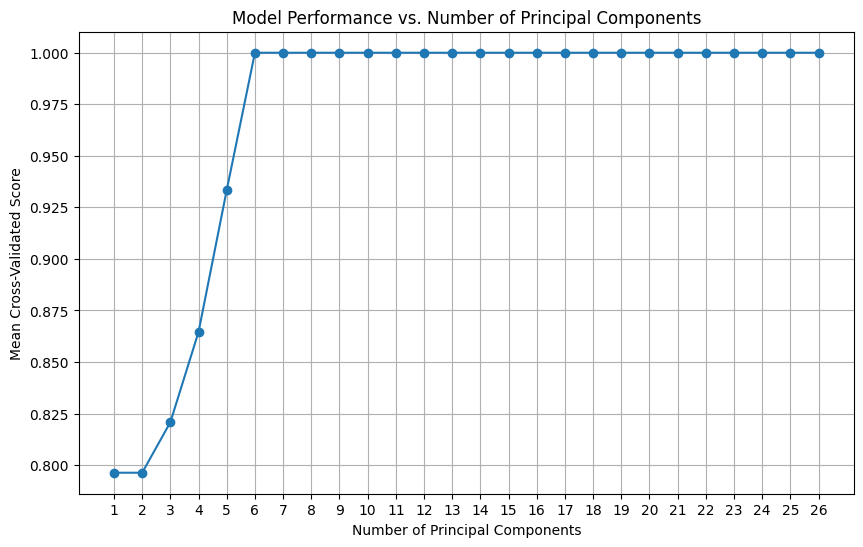

Optimal number of components: 6


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df_standardized.drop(columns=['churn'])  # 'churn'을 종속 변수로 가정하고 제거
y = df_standardized['churn']  # 종속 변수

# 주성분 개수 범위 설정
n_components_range = range(1, X.shape[1] + 1)
mean_cv_scores = []

# 주성분 개수에 따라 PCA 적용 및 교차 검증 수행
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df_standardized)
    
    # 로지스틱 회귀 모델 및 교차 검증
    model = LogisticRegression(max_iter=200)
    cv_scores = cross_val_score(model, X_pca, y, cv=5)  # 5-fold 교차 검증
    # 5-폴드 교차가 보통 기본 // 데이터셋이 클 경우 10을 사용
    mean_cv_scores.append(np.mean(cv_scores))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mean_cv_scores, marker='o')
plt.title('Model Performance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Cross-Validated Score')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

# 최적의 주성분 개수 출력
optimal_n_components = n_components_range[np.argmax(mean_cv_scores)]
print(f'Optimal number of components: {optimal_n_components}')


In [88]:
X.shape[1]

26

In [89]:
# n=23
# li=[]
# for i in range(1,n+1):
#     prin=f'principal {i}'
#     li.append(prin)
# print(li)

In [90]:
import pandas as pd
from sklearn.decomposition import PCA

n=7
li=[]
for i in range(1,n+1):
    prin=f'principal {i}'
    li.append(prin)

# 2. PCA 적용
pca = PCA(n_components=n)  # 주성분의 개수 설정
principal_components = pca.fit_transform(X)

# 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=li)

# print("PCA 결과:")
# print(pca_df)

# print("\n주성분의 설명된 분산 비율:")
# print(pca.explained_variance_ratio_)

# print("\n주성분 벡터:")
# print(pca.components_)

In [91]:
# 주성분 분석 결과
pca_df

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7
0,-0.668573,0.569798,-0.122705,-0.182919,-0.419226,0.757104,-0.401762
1,-0.676069,-0.644328,0.584933,-0.340208,-0.423356,0.759642,-0.409588
2,0.742967,0.592417,-0.067268,-0.177739,-0.404964,0.737322,-0.341126
3,0.723151,0.631374,-0.085358,-0.555577,0.647089,-0.079615,-0.109674
4,-0.680756,-0.644113,0.588778,-0.338039,-0.409866,0.758225,-0.386786
...,...,...,...,...,...,...,...
9995,0.710371,0.642462,0.220172,0.743120,0.181496,-0.042409,-0.063536
9996,-0.695739,0.622058,0.165699,0.738345,0.159681,-0.026592,-0.129331
9997,-0.688145,0.612471,-0.132442,-0.555855,0.646539,-0.067524,-0.132545
9998,0.760525,-0.635603,-0.717536,-0.018480,-0.509834,-0.681392,-0.214394


In [92]:
# 주성분의 설명된 분산 비율
pca.explained_variance_ratio_

array([0.2374085 , 0.17805369, 0.11919346, 0.10450346, 0.07813443,
       0.06184285, 0.04762551])

In [93]:
pca.explained_variance_ratio_.cumsum() # 누적합

# 주성분 분석을 통해 데이터의 차원을 축소할 때,
# 설명된 분산 비율을 보고 중요한 주성분만 선택해도 데이터의 대부분을 설명할 수 있습니다

# 0.77659791
# 주성분 7개로 얻을 수 있는 데이터에 대한 설명력

# 80% 정도는 일반적으로 충분한 설명력입니다
# 90%에 도달하려고 하면 주성분 개수가 지나치게 많아질 수 있습니다

array([0.2374085 , 0.41546219, 0.53465565, 0.63915911, 0.71729354,
       0.77913639, 0.8267619 ])

# 엘보우 방법으로 주성분 개수 찾아내기

In [94]:
# 엘보우 방법
# 데이터의 분산 비율을 기준
# 모델 성능과는 직접적인 연관이 없습니다
# 교차 검증은 주성분을 적용한 후의 모델 성능을 평가하는 것
# 엘보우 방법과 모델 성능은 다르게 측정됩니다

In [95]:
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance by Principal Components (Elbow Method)')
# plt.grid(True)
# plt.show()

# 그래프에서 엘보우(Elbow) 지점을 찾는 방법도 유용합니다.
# 설명된 분산 비율이 급격히 줄어들기 시작하는 지점을 찾고, 그 이전의 주성분을 선택하는 방식입니다.
# 설명된 분산 비율 그래프가 급격하게 꺾이는 부분에서 주성분을 선택하는 것이 좋은 기준이 될 수 있습니다.
# 그 이후로는 추가되는 주성분이 설명할 수 있는 정보가 적기 때문입니다.

### 교차 검증을 통해 모델 성능을 평가하고 주성분 개수를 선택하는 것이 모델의 예측 성능을 최적화하는 데 가장 효과적입니다.

엘보우 방법은 주성분이 데이터의 변동성을 잘 설명하는지를 판단하는 데 유용하지만, 직접적인 성능 최적화에는 한계가 있을 수 있습니다.

두 방법을 조합하여 사용하면 데이터 설명력과 모델 성능을 모두 고려한 주성분 개수 선택이 가능합니다.

# 주성분 벡터-각 주성분의 원본 특성에 대한 기여도

In [96]:
# 주성분 벡터를 데이터프레임으로 변환
components_df = pd.DataFrame(
    pca.components_, 
    columns=X.columns,  # 종속 변수 제외한 열 이름
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

In [97]:
components_df

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,age_group_gender_fifties_Female,...,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,active_member_0,active_member_1
PC1,-0.007520,0.006738,-0.003363,0.009744,-0.010283,0.028201,-0.017918,-0.000559,-0.000962,-0.004787,...,-0.009611,-0.016875,0.000205,-0.001031,0.013709,0.001265,-0.000429,0.001351,0.705927,-0.705927
PC2,-0.003138,0.008550,0.000005,-0.005947,0.815339,-0.417498,-0.397840,0.000954,-0.000525,-0.014550,...,0.001322,0.000298,-0.000515,-0.000378,0.016518,0.028095,0.008608,0.008355,0.009600,-0.009600
PC3,-0.000426,0.012979,-0.002181,-0.017499,-0.017892,-0.673885,0.691777,-0.000135,-0.000395,-0.016492,...,-0.003461,0.000562,-0.001176,0.000479,-0.074058,0.231195,-0.004269,-0.004410,0.024164,-0.024164
PC4,-0.000296,0.013449,-0.002603,-0.006869,-0.013201,0.182212,-0.169011,-0.000253,-0.000169,-0.015281,...,-0.006414,-0.009868,-0.000118,-0.001480,-0.467045,0.831204,-0.041023,-0.051893,0.000689,-0.000689
PC5,0.008413,0.048383,0.002675,-0.031291,-0.028371,0.055091,-0.026720,-0.000464,-0.000379,-0.032071,...,-0.011521,-0.015419,-0.000523,-0.001803,0.758081,0.292014,-0.073396,-0.097561,0.001042,-0.001042
PC6,0.003492,0.002859,0.001301,0.020044,0.007857,-0.017422,0.009565,0.000207,0.000187,0.015375,...,0.005322,0.007303,0.000297,0.001062,-0.110928,-0.074081,0.045353,0.066797,-0.006366,0.006366
PC7,0.000556,0.165444,-0.004144,-0.049161,-0.014156,0.020098,-0.005943,0.000260,0.000422,0.058202,...,0.013073,0.017091,0.001900,0.005564,-0.212890,-0.167378,0.324318,0.679591,0.014605,-0.014605


# 주성분 벡터 시각화

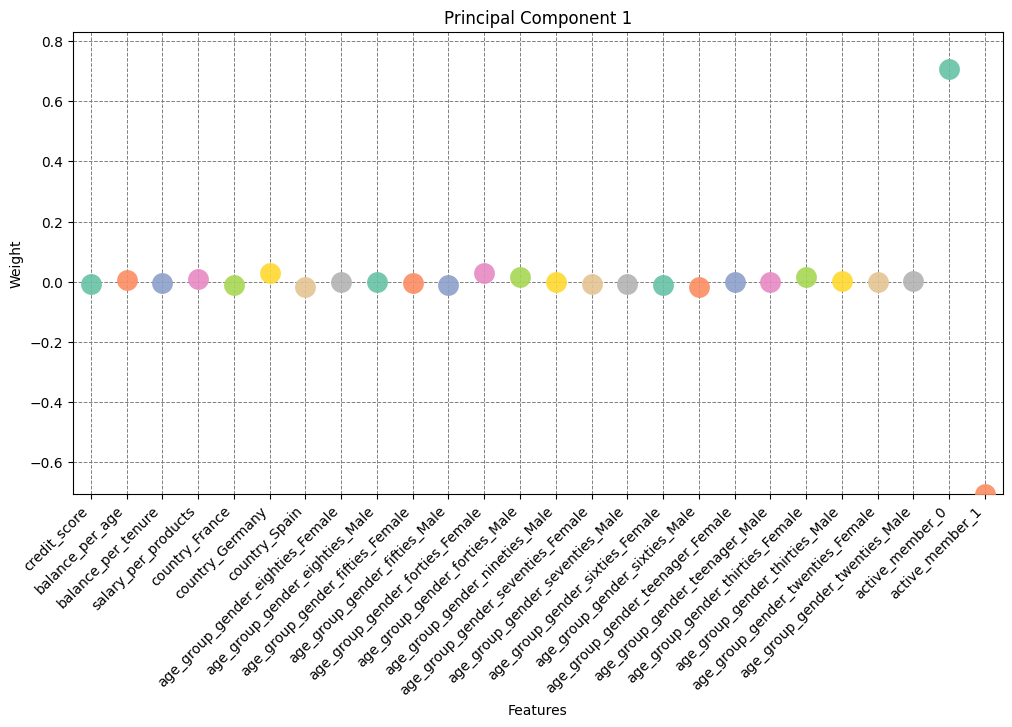

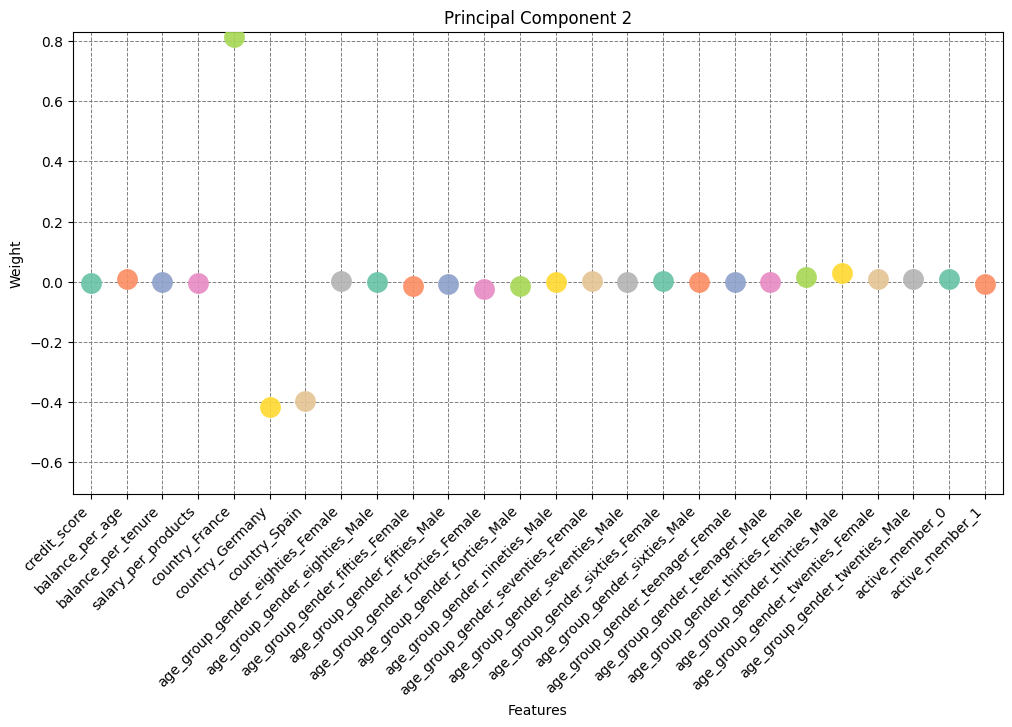

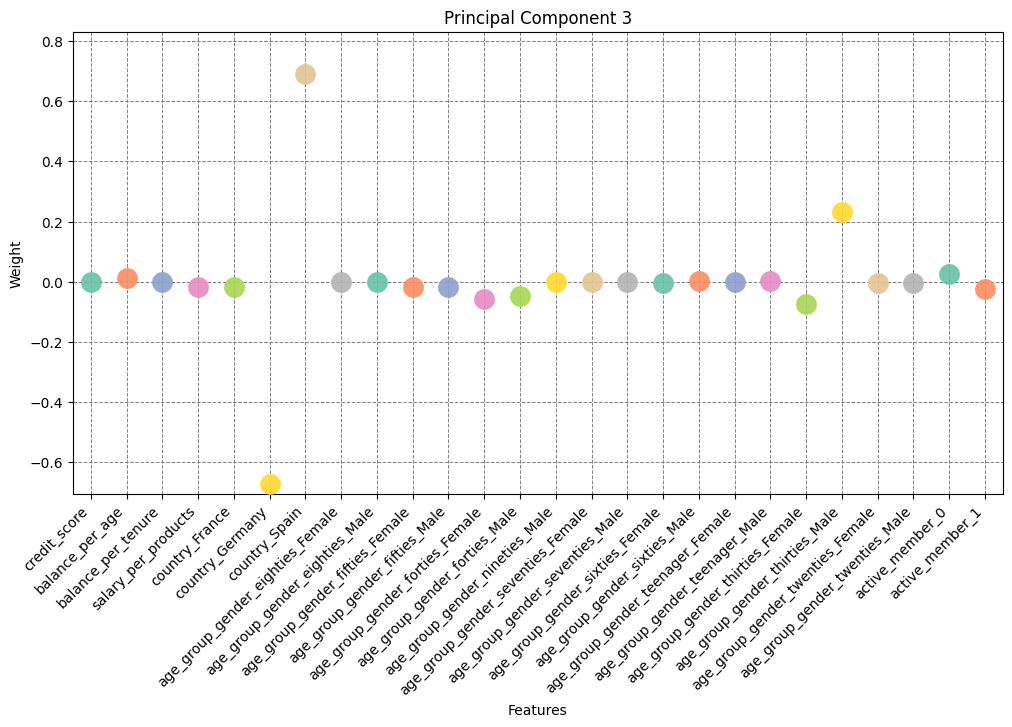

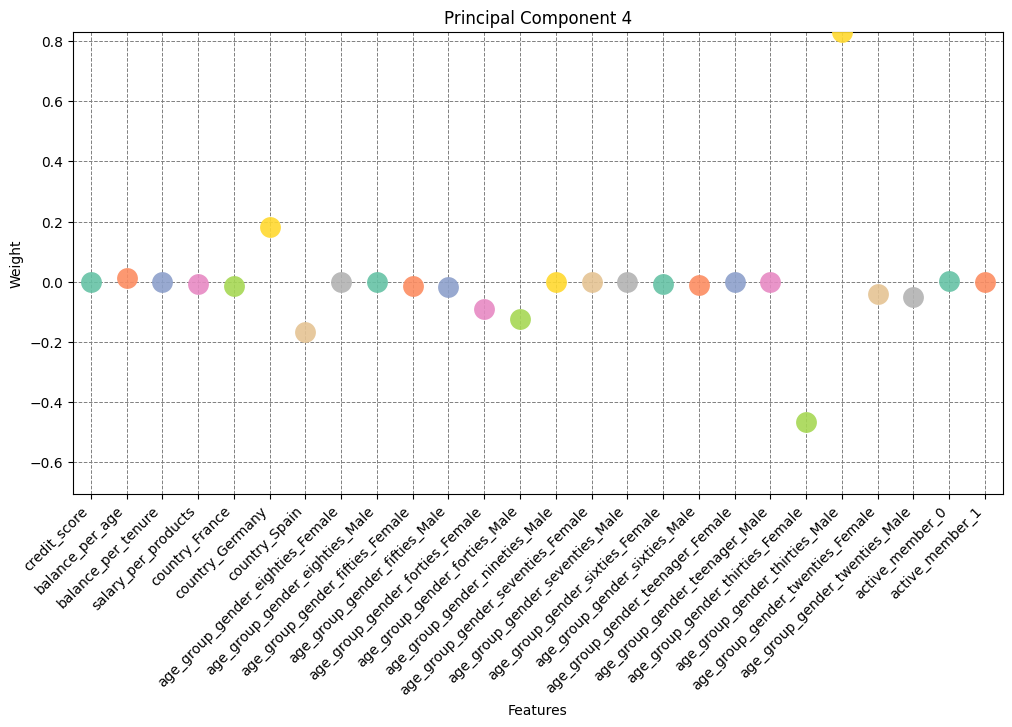

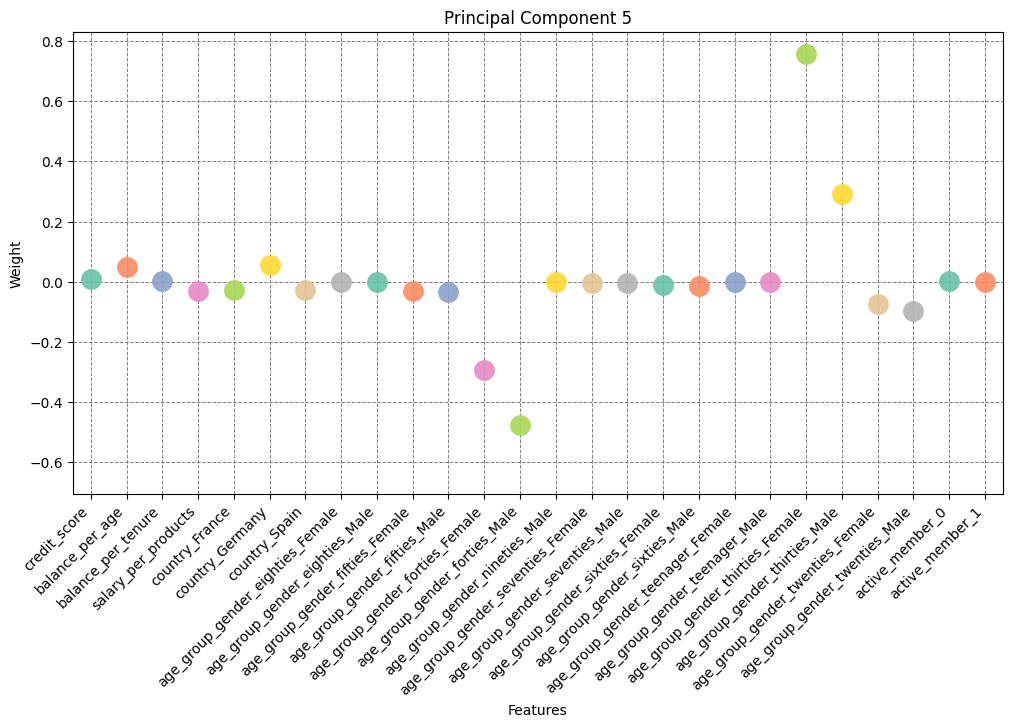

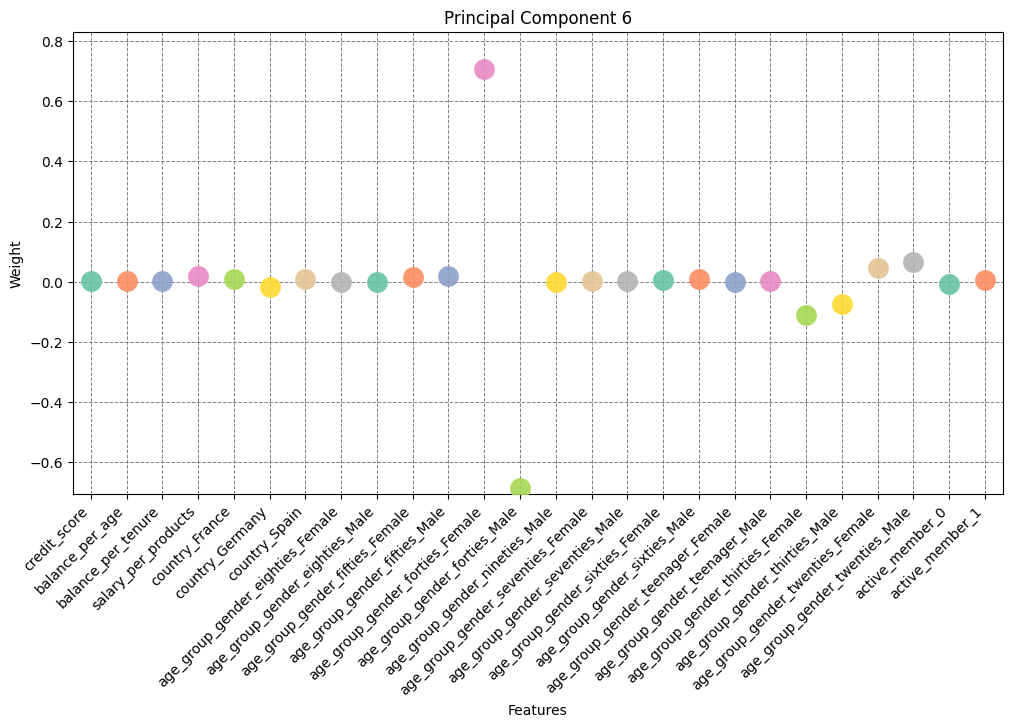

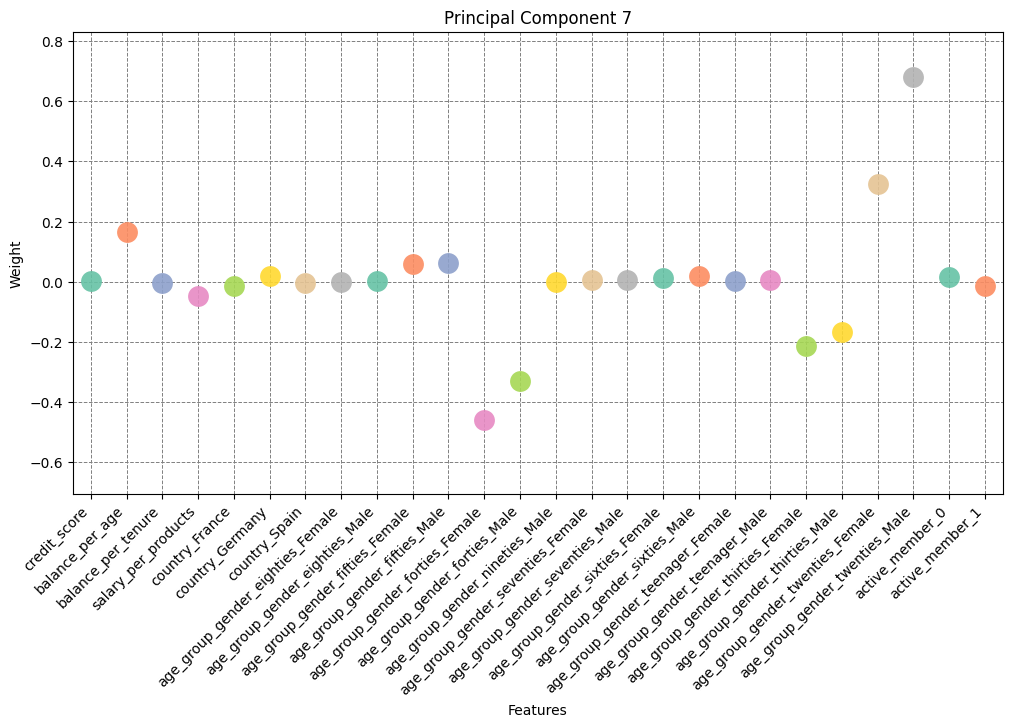

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# 데이터프레임의 길이를 맞추기 위해 Melt
melted_df = components_df.reset_index().melt(id_vars='index', var_name='Feature', value_name='Weight')
melted_df.rename(columns={'index': 'Principal Component'}, inplace=True)

# Y축 범위를 동일하게 설정하기 위해 모든 주성분의 Weight의 범위를 찾기
min_weight = melted_df['Weight'].min()
max_weight = melted_df['Weight'].max()

# 각 주성분별로 바이올린 플롯을 개별적으로 생성
for i in range(7):
    plt.figure(figsize=(12, 6))
    # 점으로 데이터 표시
    sns.stripplot(x='Feature', y='Weight', hue='Feature', data=melted_df[melted_df['Principal Component'] == f'PC{i+1}'],   
              dodge=False, # 점들이 중심에 맞추어 배치되도록 합니다. 기본값은 True로, 이 경우 각 범주에 대해 점이 약간 이동합니다.
              palette='Set2', size=15, alpha=0.9, jitter=True)
    plt.title(f'Principal Component {i+1}')
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')  # 그리드 추가
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')  # x축 레이블을 45도 기울이기
    plt.ylim(min_weight, max_weight)  # y축 범위 설정
    # plt.legend_.remove()  # 범례 제거
    plt.show()

# 벡터는 크기나 방향이 절대적이지 않고 데이터에 따라 상대적이다

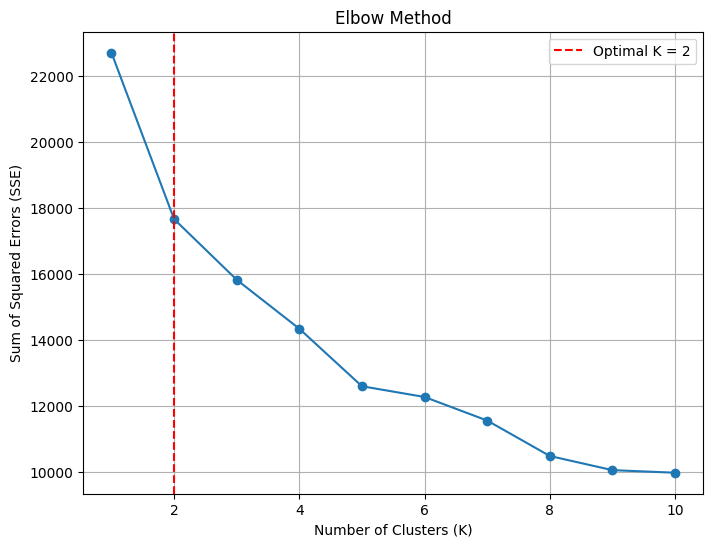

Optimal number of clusters: 2


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K 값의 범위를 설정
K_range = range(1, 11)
SSE = []

# 각 K 값에 대해 K-평균 클러스터링 수행
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_standardized)
    SSE.append(kmeans.inertia_)

# SSE의 1차 및 2차 변화량 계산
SSE = np.array(SSE)
delta_SSE = np.diff(SSE)
delta2_SSE = np.diff(delta_SSE)

# 가장 큰 2차 변화량 찾기
optimal_K = np.argmax(delta2_SSE) + 2  # +2는 K값이 1부터 시작하므로

# 엘보우 방법 플롯
plt.figure(figsize=(8, 6))
plt.plot(K_range, SSE, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)

# 가장 꺾임이 심한 부분에 선 추가
plt.axvline(x=optimal_K, color='r', linestyle='--', label=f'Optimal K = {optimal_K}')
plt.legend()
plt.show()

print(f'Optimal number of clusters: {optimal_K}')


In [107]:
X

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,age_group_gender_fifties_Female,...,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male,active_member_0,active_member_1
0,0.538,0.272722,0.196267,0.506790,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.516,0.192734,0.206282,0.562770,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.304,0.366438,0.082654,0.189867,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.698,0.294417,0.298455,0.234557,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.000,0.279199,0.205939,0.395443,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.294417,0.094080,0.240668,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,0.332,0.152706,0.018575,0.508545,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.319728,0.068533,0.210413,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,0.844,0.167372,0.087917,0.232211,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=42)  # 클러스터 개수 K를 3으로 설정
clusters = kmeans.fit_predict(df_standardized)

# 클러스터링 결과를 데이터프레임에 추가
X['Cluster'] = clusters

# K-평균 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=clusters, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>